<img src="function_overview_seaborn.png" width="400">


Seaborn 是 Python 的一個資料視覺化模組，建立在 Matplotlib 基礎上，提供了更高階、更方便使用的資料視覺化工具。以下是 Seaborn 的詳細說明及其與 Matplotlib 的關係。

### Seaborn 簡介

1. **什麼是 Seaborn**
   - **Seaborn** 是一個基於 Matplotlib 的 Python 資料視覺化庫，主要用於製作統計圖形。Seaborn 提供了一個 high API，能夠讓使用者更方便地繪製出美觀且富有資訊的圖表。
   - **Seaborn** 專注於讓資料視覺化變得更加簡單和直觀，特別是對於複雜的數據集和統計圖形。

2. **主要特性**
   - **預設樣式和調色盤**：Seaborn 提供了美觀且一致的預設樣式和調色盤，使得圖形不僅資訊豐富，而且美觀。
   - **統計圖形**：Seaborn 支援多種統計圖形，如分佈圖、關係圖和分類圖，能夠幫助使用者更好地理解數據。
   - **資料集支持**：內建了多個範例數據集，便於快速開始學習和使用。
   - **簡單的 API**：提供了簡潔的函數和參數設置，讓複雜的圖形製作變得簡單。

### Seaborn 與 Matplotlib 的關係

1. **基礎**
   - **Matplotlib** 是一個基礎的繪圖模組，提供了製作各種圖形的基本功能。它具有高度的靈活性，但需要較多的代碼來設置圖形的細節。
   - **Seaborn** 則是基於 Matplotlib 構建的模組，旨在簡化數據視覺化的過程，特別是針對統計圖形。Seaborn 自動處理了許多繁瑣的設置工作，使得使用者能夠更快速地生成高質量的圖形。

2. **互補性**
   - **Seaborn** 和 **Matplotlib** 可以互補使用。使用者可以先用 Seaborn 繪製圖形，再利用 Matplotlib 進行進一步的細節調整。
   - 例如，可以先用 Seaborn 繪製一個條形圖，然後用 Matplotlib 添加標題、標籤或自定義格式。

### Seaborn 的主要函數和應用

1. **分佈圖（Distribution Plots）**
   - `sns.displot()`：繪製直方圖和核密度圖（KDE）
   - `sns.kdeplot()`：繪製核密度圖
   - `sns.ecdfplot()`：繪製累積分佈函數圖（ECDF）

2. **關係圖（Relational Plots）**
   - `sns.relplot()`：繪製散佈圖和折線圖
   - `sns.scatterplot()`：繪製散佈圖
   - `sns.lineplot()`：繪製折線圖

3. **分類圖（Categorical Plots）**
   - `sns.catplot()`：繪製分類圖，如長條圖、箱型圖和小提琴圖
   - `sns.barplot()`：繪製長條圖
   - `sns.boxplot()`：繪製箱型圖
   - `sns.violinplot()`：繪製小提琴圖

In [4]:
from matplotlib import pyplot as plt
import yfinance as yf
import seaborn as sns

tsmc = yf.download("2330.tw", start="2023-01-01", end="2023-12-31")
# 計算每日價格變化
tsmc['Change'] = tsmc['Close'].diff()
tsmc["K_Change"] = tsmc.Close - tsmc.Open
tsmc["Change_status"] = tsmc.Change.apply(lambda x: "r" if x > 0 else "g")
tsmc["K_status"] = tsmc.K_Change.apply(lambda x: "r" if x >= 0 else "g")

[*********************100%%**********************]  1 of 1 completed


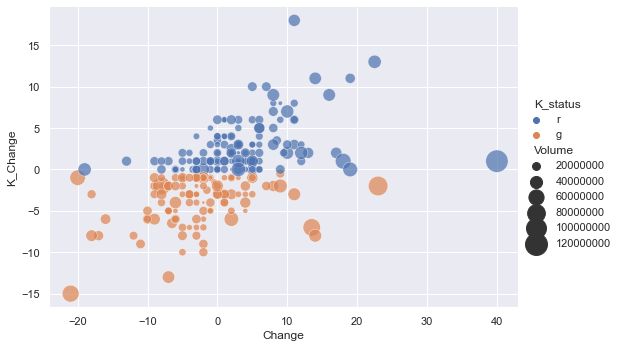

In [32]:
sns.set_theme()
sns.relplot(data=tsmc, x="Change", y="K_Change", hue="K_status", 
            size="Volume", sizes=(10, 500),
            aspect=1.5, height=5, alpha=0.7)
plt.show()

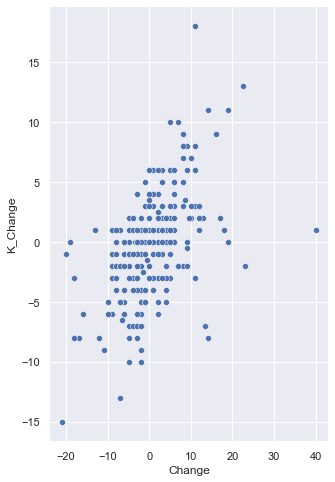

In [22]:
plt.figure(figsize=(5, 8))
sns.scatterplot(data=tsmc, x="Change", y="K_Change")
plt.show()

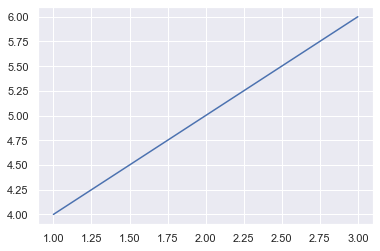

In [23]:
plt.plot([1, 2, 3], [4, 5, 6])

In [36]:
tsmc.head()

,Open,High,Low,Close,Adj Close,Volume,Change,K_Change,Change_status,K_status
Date,,,,,,,,,,
2023-01-03,446.0,453.5,443.0,453.0,441.594727,14885824,NaN,7.0,g,r
2023-01-04,449.5,455.0,448.5,449.5,438.182861,19188422,-3.5,0.0,g,r
2023-01-05,459.0,459.5,455.0,458.5,446.956238,23549581,9.0,-0.5,r,g
2023-01-06,455.0,459.5,455.0,458.5,446.956238,20886011,0.0,3.5,g,r
2023-01-09,468.0,481.0,467.5,481.0,468.889771,46666263,22.5,13.0,r,r


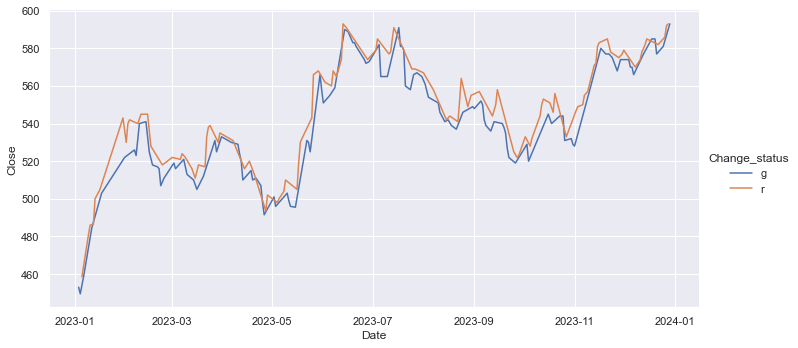

In [41]:
sns.relplot(data=tsmc, kind="line", x="Date", y="Close", aspect=2, hue="Change_status")
plt.show()

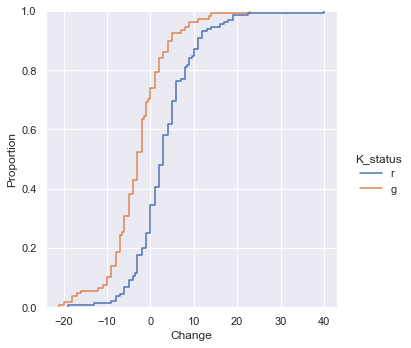

In [55]:
sns.displot(data=tsmc, x="Change", hue="K_status", kind="ecdf")
plt.show()

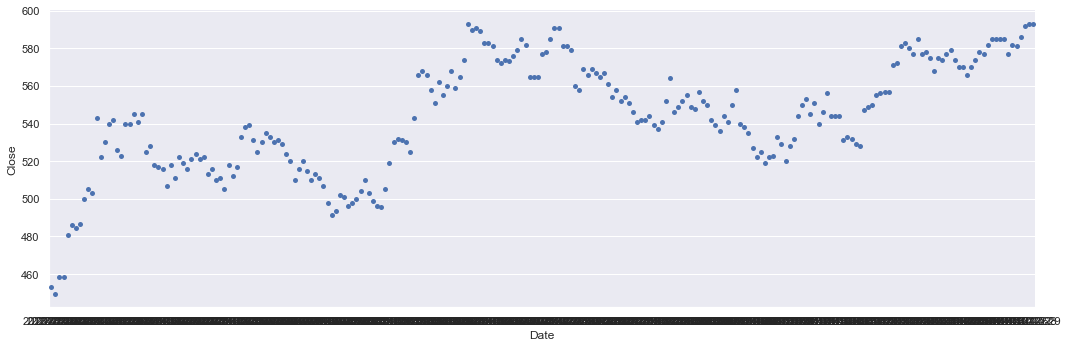

In [58]:
tsmc.resample("M")
sns.catplot(data=tsmc, x="Date", y="Close", aspect=3)

In [74]:
tsmc_month_close = tsmc.resample("M").Close.mean()
tsmc2 = tsmc_month_close.to_frame()

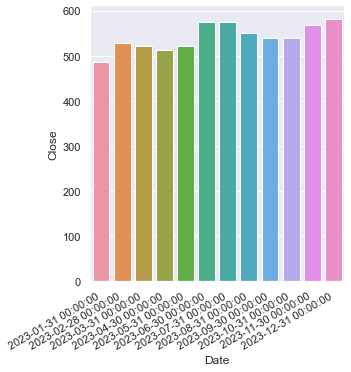

In [78]:
sns.catplot(kind="bar", data=tsmc2, x=tsmc2.index, y="Close")
plt.gcf().autofmt_xdate()
plt.show()

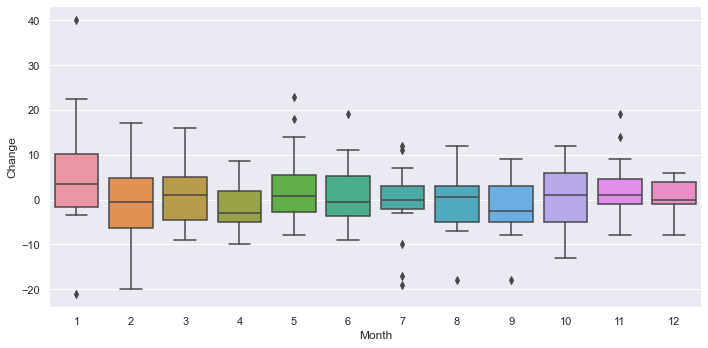

In [86]:
tsmc["Month"] = tsmc.index.month
tsmc
sns.catplot(kind="box", data=tsmc, x="Month", y="Change", aspect=2)

In [80]:
tsmc

,Open,High,Low,Close,Adj Close,Volume,Change,K_Change,Change_status,K_status
Date,,,,,,,,,,
2023-01-03,446.0,453.5,443.0,453.0,441.594727,14885824,NaN,7.0,g,r
2023-01-04,449.5,455.0,448.5,449.5,438.182861,19188422,-3.5,0.0,g,r
2023-01-05,459.0,459.5,455.0,458.5,446.956238,23549581,9.0,-0.5,r,g
2023-01-06,455.0,459.5,455.0,458.5,446.956238,20886011,0.0,3.5,g,r
2023-01-09,468.0,481.0,467.5,481.0,468.889771,46666263,22.5,13.0,r,r
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,582.0,585.0,580.0,581.0,578.299622,9548143,-1.0,-1.0,g,g
2023-12-26,583.0,586.0,582.0,586.0,583.276367,16094308,5.0,3.0,r,r
2023-12-27,587.0,592.0,586.0,592.0,589.248535,33401336,6.0,5.0,r,r
